# Modelos Contraceptive Method

### Emma Amorós Belda

##### Dataset: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

En este documento entrenamos modelos para realizar la clasificación del Método anticonceptivo que emplea la mujer, en base a los resultados obtenidos en Contraceptive_AED.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import multiprocessing

In [5]:
data = pd.read_csv("./data/cmc.data", delimiter=",", header = None, 
                   names = ['Age', 'Education', 'Husband_education', 'Children', 'Religion', 'Work', 'Husband_work',
                           'Living_index', 'Media_exposure', 'Contraceptive'])
print(data.shape)

(1473, 10)


Asignamos ordenación a las variables categóricas ordinales y realizamos one-hot-encoding con aquellas que no tienen orden. Las binarias con que sean 0 y 1 es suficiente

In [6]:
# categóricas ordinales: les asignamos el orden

ordinales = ['Education', 'Husband_education', 'Living_index']

encoder = OrdinalEncoder(categories = [['1','2','3','4']])

for i in ordinales:
  #data[i] = pd.Categorical(data[i], categories = ['1','2','3','4'])
  encoder.fit(data[[i]])
  data[i] = encoder.transform(data[[i]])

# no ordenadas: one hot encoding 

Husband_work_oh = pd.get_dummies(data['Husband_work'], prefix = 'Husband_work')
data = data.join(Husband_work_oh)

del data['Husband_work']


In [7]:
data

,Age,Education,Husband_education,Children,Religion,Work,Living_index,Media_exposure,Contraceptive,Husband_work_1,Husband_work_2,Husband_work_3,Husband_work_4
0,24,1.0,2.0,3,1,1,2.0,0,1,0,1,0,0
1,45,0.0,2.0,10,1,1,3.0,0,1,0,0,1,0
2,43,1.0,2.0,7,1,1,3.0,0,1,0,0,1,0
3,42,2.0,1.0,9,1,1,2.0,0,1,0,0,1,0
4,36,2.0,2.0,8,1,1,1.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,33,3.0,3.0,2,1,0,3.0,0,3,0,1,0,0
1469,33,3.0,3.0,3,1,1,3.0,0,3,1,0,0,0
1470,39,2.0,2.0,8,1,0,3.0,0,3,1,0,0,0
1471,33,2.0,2.0,4,1,0,1.0,0,3,0,1,0,0


# Train_test_split

Dividimos nuestro conjunto de datos en un 80% de train y un 20% para test

In [8]:
X = data.drop('Contraceptive', axis = 1)
y = data.iloc[:,8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)#,stratify = y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(1178, 12) (1178,) (295, 12) (295,)


In [9]:
# observamos el número de registros de cada clase a predecir en nuestro conjunto de train
freq_class = y_train.value_counts()

freq_class = pd.DataFrame(freq_class).sort_index(ascending=True).reset_index()
freq_class = freq_class.rename(columns = {'index':'Category', 'Contraceptive':'Counts'})
freq_class['Frecuency'] = freq_class['Counts']/data.shape[0]

freq_class

,Category,Counts,Frecuency
0,1,498,0.338086
1,2,254,0.172437
2,3,426,0.289206


In [10]:
# observamos el número de registros de cada clase a predecir en el conjunto de test
freq_class = y_test.value_counts()

freq_class = pd.DataFrame(freq_class).sort_index(ascending=True).reset_index()
freq_class = freq_class.rename(columns = {'index':'Category', 'Contraceptive':'Counts'})
freq_class['Frecuency'] = freq_class['Counts']/data.shape[0]

freq_class

,Category,Counts,Frecuency
0,1,131,0.088934
1,2,79,0.053632
2,3,85,0.057705


# Modelos Básicos

Podemos aplicar cualquier modelo de clasficación supervisada a nuestro problema.

Opciones:

1. Knn
2. XGBoost
3. AdaBoost 
4. Random Forest
5. Decision Tree
6. SVM
7. Naive Bayes 
8. Logistic Regression


En este primer caso los aplicamos directamente a los datos sin realizar ningún cambio, es decir, le pasamos todos los atributos . 


## Logistic Regression 

Referencia para clasificaciones binarias. Es nuestro modelo base, el que debe mejorar cualquiera de los siguientes modelos.

In [ ]:
regresion_logistica = LogisticRegression()
regresion_logistica.fit(X_train,y_train)
regresion_logistica.score(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.49745331069609505

In [ ]:
regresion_logistica.score(X_test, y_test)

0.5627118644067797

In [ ]:
predict = regresion_logistica.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           1       0.66      0.69      0.68       131
           2       0.58      0.32      0.41        79
           3       0.43      0.59      0.50        85

    accuracy                           0.56       295
   macro avg       0.56      0.53      0.53       295
weighted avg       0.58      0.56      0.56       295



In [ ]:
conf_matrix = confusion_matrix(y_test, predict)
print(conf_matrix)

[[91  6 34]
 [23 25 31]
 [23 12 50]]


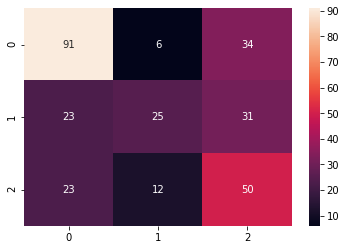

In [ ]:
sns.heatmap(conf_matrix, annot= True)

## Decision Tree

In [ ]:
#Model parameters to try
criterio = ['gini', 'entropy']
max_depth = [2,3,4,5,6,7]
max_features = ['auto', 'log2']
splitter = ['best','random']

tuned_parameters = {'criterion': criterio, 'max_depth': max_depth, 'max_features': max_features, 'splitter': splitter}


# search the best model 
clf = DecisionTreeClassifier(random_state=0)
clf_clf = GridSearchCV(clf, tuned_parameters, cv = 5, n_jobs = -1 , verbose = 0)


clf_clf.fit(X_train, y_train)
clf_best = clf_clf.best_estimator_
print(clf_best)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


In [ ]:
print(clf_best.score(X_train,y_train))
print(clf_best.score(X_test,y_test))

0.530560271646859
0.47796610169491527


              precision    recall  f1-score   support

           1       0.60      0.40      0.48       131
           2       0.55      0.39      0.46        79
           3       0.38      0.67      0.49        85

    accuracy                           0.48       295
   macro avg       0.51      0.49      0.48       295
weighted avg       0.52      0.48      0.48       295

[[53 12 66]
 [21 31 27]
 [15 13 57]]


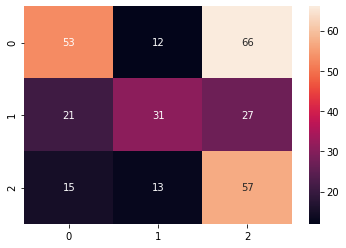

In [ ]:
# predecimos en test y evaluamos métricas y vemos la matriz de confusión

predict = clf_best.predict(X_test)
print(classification_report(y_test, predict))

conf_matrix = confusion_matrix(y_test, predict)
print(conf_matrix)
sns.heatmap(conf_matrix, annot= True)

## Random Forest

In [ ]:
rfc = RandomForestClassifier(random_state = 0)

#Model parameters to try
n_estimators = [50, 100, 150, 200]
maxprof = range(2, 5)

tuned_parameters = {'n_estimators': n_estimators, 'max_depth': maxprof}  

# search the best model 
clf_rfc = GridSearchCV(rfc, tuned_parameters, cv = 5, n_jobs = -1 , verbose = 0)

clf_rfc.fit(X_train, y_train)
rf = clf_rfc.best_estimator_
print(rf)

print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.5673839184597962
0.5457627118644067


              precision    recall  f1-score   support

           1       0.71      0.54      0.62       271
           2       0.55      0.23      0.33       129
           3       0.44      0.76      0.56       190

    accuracy                           0.55       590
   macro avg       0.57      0.51      0.50       590
weighted avg       0.59      0.55      0.53       590

[[147  11 113]
 [ 29  30  70]
 [ 31  14 145]]


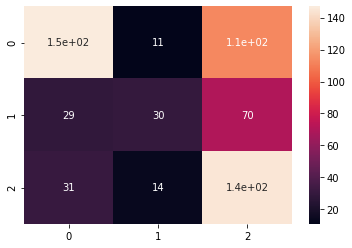

In [ ]:
# predecimos en test y evaluamos métricas y vemos la matriz de confusión

predict = rf.predict(X_test)
print(classification_report(y_test, predict))

conf_matrix = confusion_matrix(y_test, predict)
print(conf_matrix)
sns.heatmap(conf_matrix, annot= True)

##### Importancia de las características según Random Forest

Las importancias de características basadas en impurezas calculadas en modelos basados ​​en árboles adolecen de dos defectos que pueden llevar a conclusiones engañosas. Primero, se calculan sobre estadísticas derivadas del conjunto de datos de entrenamiento y, por lo tanto , no necesariamente nos informan sobre qué características son más importantes para hacer buenas predicciones en el conjunto de datos retenido . En segundo lugar, favorecen las características de alta cardinalidad , es decir, características con muchos valores únicos. La importancia de la característica de permutación es una alternativa a la importancia de la característica basada en impurezas que no adolece de estos defectos.

In [ ]:
# importancia por pureza de nodos 

importances = pd.DataFrame({'Feature': X.columns, 'Importancia': rf.feature_importances_})
importances.sort_values(by = ['Importancia'], ascending = False)

In [ ]:
# importancia por permutación 

importancia = permutation_importance(
                estimator    = rf,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

## Ada Boost

In [ ]:
#Model parameters to try

n_estimators = [50, 100, 150, 200]
learning_rate = [0.2, 0.4, 0.5, 0.7, 1]

tuned_parameters = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

# search the best model 
clf_ada = AdaBoostClassifier(random_state=0)
ada_clf = GridSearchCV(clf_ada, tuned_parameters, cv = 5, n_jobs = -1 , verbose = 0)


ada_clf.fit(X_train, y_train)
ada_best = ada_clf.best_estimator_
print(ada_best)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=50, random_state=0)


In [ ]:
print(ada_best.score(X_train, y_train))
print(ada_best.score(X_test, y_test))

0.5537938844847112
0.5966101694915255


              precision    recall  f1-score   support

           1       0.77      0.66      0.71       271
           2       0.45      0.31      0.37       129
           3       0.49      0.70      0.58       190

    accuracy                           0.60       590
   macro avg       0.57      0.56      0.55       590
weighted avg       0.61      0.60      0.59       590

[[179  22  70]
 [ 21  40  68]
 [ 31  26 133]]


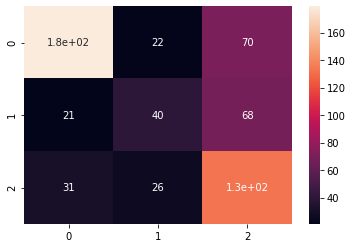

In [ ]:
# predecimos en test y evaluamos métricas y vemos la matriz de confusión

predict = ada_best.predict(X_test)
print(classification_report(y_test, predict))

conf_matrix = confusion_matrix(y_test, predict)
print(conf_matrix)
sns.heatmap(conf_matrix, annot= True)

## SVM

## Gradient Boosting

In [ ]:
#Model parameters to try

n_estimators = [50, 100, 150, 200]
learning_rate = [0.2, 0.4, 0.5, 0.7, 1]
max_depth = [2,3,4,5,6,7,8]

tuned_parameters = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'max_depth': max_depth}

# search the best model 
clf_gbc = GradientBoostingClassifier(random_state=0)
gbc_clf = GridSearchCV(clf_gbc, tuned_parameters, cv = 5, n_jobs = -1 , verbose = 0)


gbc_clf.fit(X_train, y_train)
gbc_best = gbc_clf.best_estimator_
print(gbc_best)

print(gbc_best.score(X_train, y_train))
print(gbc_best.score(X_test, y_test))

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.6417657045840407
0.5661016949152542


              precision    recall  f1-score   support

           1       0.69      0.66      0.68       131
           2       0.59      0.37      0.45        79
           3       0.42      0.60      0.50        85

    accuracy                           0.57       295
   macro avg       0.57      0.54      0.54       295
weighted avg       0.59      0.57      0.57       295

[[87  5 39]
 [20 29 30]
 [19 15 51]]


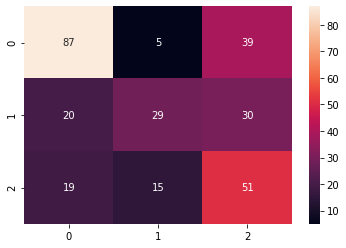

In [ ]:
# predecimos en test y evaluamos métricas y vemos la matriz de confusión

predict = gbc_best.predict(X_test)
print(classification_report(y_test, predict))

conf_matrix = confusion_matrix(y_test, predict)
print(conf_matrix)
sns.heatmap(conf_matrix, annot= True)

##### Importancia de las características según gradient Boosting

In [ ]:
# se basa en la entropía para obtener las características 

importances = pd.DataFrame({'Feature': X.columns, 'Importancia': gbc_best.feature_importances_ })
importances.sort_values(by = ['Importancia'], ascending = False)

,Feature,Importancia
3,Children,0.388976
0,Age,0.320457
1,Education,0.153438
6,Living_index,0.042992
2,Husband_education,0.025919
8,Husband_work_1,0.023094
10,Husband_work_3,0.012778
7,Media_exposure,0.008162
5,Work,0.007091
11,Husband_work_4,0.006609


# Modelos 2

Eliminamos las variables que en el AED hemos visto que son menos importantes, ya que presentan menos relación con la clase a predecir. Estas son Religión y Work. 

Además, habíamos comentado que se colapasaría husband_work, los grupos 2 y 4 para que estuviesen menos desbalanceados (es categórica no ordenada). 

## Train_test_split

In [ ]:
data_mod3 = data.copy()

# eliminamos religion (muy desbalanceada) y eliminamos work 

del data_mod3['Religion']
del data_mod3['Work']

# colapsamos husband work 4 y 2 
del data_mod3['Husband_work_1']
del data_mod3['Husband_work_2']
del data_mod3['Husband_work_3']
del data_mod3['Husband_work_4']

data_mod3['Husband_work'] = df['Husband_work']
data_mod3.Husband_work = data_mod3.Husband_work.replace({4:2})
data_mod3 = pd.get_dummies(data_mod3, prefix = ['Husband_work'], columns = ['Husband_work'])

data_mod3

,Age,Education,Husband_education,Children,Living_index,Media_exposure,Contraceptive,Husband_work_1,Husband_work_2,Husband_work_3
0,24,1.0,2.0,3,2.0,0,1,0,1,0
1,45,0.0,2.0,10,3.0,0,1,0,0,1
2,43,1.0,2.0,7,3.0,0,1,0,0,1
3,42,2.0,1.0,9,2.0,0,1,0,0,1
4,36,2.0,2.0,8,1.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,3.0,3.0,2,3.0,0,3,0,1,0
1469,33,3.0,3.0,3,3.0,0,3,1,0,0
1470,39,2.0,2.0,8,3.0,0,3,1,0,0
1471,33,2.0,2.0,4,1.0,0,3,0,1,0


In [ ]:
X3 = data_mod3.drop('Contraceptive', axis = 1)
y3 = data_mod3.iloc[:,6]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 1234)
print(X_train3.shape, y_train3.shape, X_test3.shape, y_test3.shape)

(1178, 9) (1178,) (295, 9) (295,)


In [ ]:
freq_class = y_train3.value_counts()

freq_class = pd.DataFrame(freq_class).sort_index(ascending=True).reset_index()
freq_class = freq_class.rename(columns = {'index':'Category', 'Contraceptive':'Counts'})
freq_class['Frecuency'] = freq_class['Counts']/data.shape[0]

freq_class

,Category,Counts,Frecuency
0,1,498,0.338086
1,2,254,0.172437
2,3,426,0.289206


## Logistic regression

In [ ]:
regresion_logistica = LogisticRegression()
regresion_logistica.fit(X_train3,y_train3)
print(regresion_logistica.score(X_train3,y_train3))
print(regresion_logistica.score(X_test3, y_test3))

0.5033955857385399
0.5457627118644067


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           1       0.64      0.72      0.68       131
           2       0.58      0.27      0.37        79
           3       0.41      0.54      0.46        85

    accuracy                           0.55       295
   macro avg       0.54      0.51      0.50       295
weighted avg       0.56      0.55      0.53       295

[[94  5 32]
 [23 21 35]
 [29 10 46]]


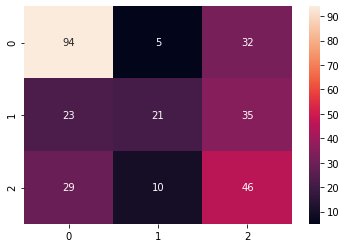

In [ ]:
predict3 = regresion_logistica.predict(X_test3)
print(classification_report(y_test3, predict3))

conf_matrix3 = confusion_matrix(y_test3, predict3)
print(conf_matrix3)

sns.heatmap(conf_matrix3, annot= True)

## Random Forest

In [ ]:
#Model parameters to try
n_estimators = [50, 100, 150, 200]
maxprof = range(2, 5)

tuned_parameters = {'n_estimators': n_estimators, 'max_depth': maxprof}  

# search the best model 
rfc = RandomForestClassifier(random_state = 0)
clf_rfc = GridSearchCV(rfc, tuned_parameters, cv = 5, n_jobs = -1 , verbose = 0)

clf_rfc.fit(X_train3, y_train3)
rf = clf_rfc.best_estimator_
print(rf)

print(rf.score(X_train3, y_train3))
print(rf.score(X_test3, y_test3))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
0.5832389580973952
0.5627118644067797


              precision    recall  f1-score   support

           1       0.76      0.58      0.66       271
           2       0.45      0.32      0.37       129
           3       0.46      0.70      0.55       190

    accuracy                           0.56       590
   macro avg       0.56      0.53      0.53       590
weighted avg       0.59      0.56      0.56       590

[[158  23  90]
 [ 21  41  67]
 [ 30  27 133]]


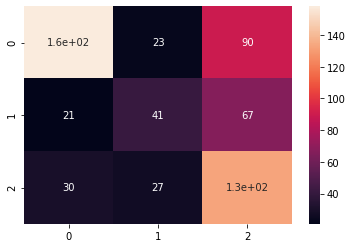

In [ ]:
# predecimos en test y evaluamos métricas y vemos la matriz de confusión

predict1 = rf.predict(X_test3)
print(classification_report(y_test3, predict1))

conf_matrix1 = confusion_matrix(y_test3, predict1)
print(conf_matrix1)

sns.heatmap(conf_matrix1, annot= True)

## Ada Boost

In [ ]:
#Model parameters to try

n_estimators = [50, 100, 150, 200]
learning_rate = [0.2, 0.4, 0.5, 0.7, 1]

tuned_parameters = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

# search the best model 
clf_ada = AdaBoostClassifier(random_state=0)
ada_clf = GridSearchCV(clf_ada, tuned_parameters, cv = 5, n_jobs = -1 , verbose = 0)


ada_clf.fit(X_train3, y_train3)
ada_best = ada_clf.best_estimator_
print(ada_best)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=50, random_state=0)


              precision    recall  f1-score   support

           1       0.79      0.63      0.70       131
           2       0.52      0.28      0.36        79
           3       0.43      0.75      0.55        85

    accuracy                           0.57       295
   macro avg       0.58      0.56      0.54       295
weighted avg       0.62      0.57      0.57       295

[[83 11 37]
 [10 22 47]
 [12  9 64]]


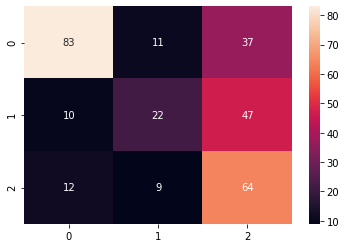

In [ ]:
# predecimos en test y evaluamos métricas y vemos la matriz de confusión

predict3 = ada_best.predict(X_test3)
print(classification_report(y_test3, predict3))

conf_matrix3 = confusion_matrix(y_test3, predict3)
print(conf_matrix3)
sns.heatmap(conf_matrix3, annot= True)

## Gradient Boosting

In [ ]:
#Model parameters to try

n_estimators = [50, 100, 150, 200]
learning_rate = [0.2, 0.4, 0.5, 0.7, 1]
max_depth = [2,3,4,5,6,7,8]

tuned_parameters = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'max_depth': max_depth}

# search the best model 
clf_gbc = GradientBoostingClassifier(random_state=0)
gbc_clf = GridSearchCV(clf_gbc, tuned_parameters, cv = 5, n_jobs = -1 , verbose = 0)


gbc_clf.fit(X_train3, y_train3)
gbc_best = gbc_clf.best_estimator_
print(gbc_best)

print(gbc_best.score(X_train3, y_train3))
print(gbc_best.score(X_test3, y_test3))

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.6816638370118846
0.5864406779661017


              precision    recall  f1-score   support

           1       0.69      0.66      0.67       131
           2       0.66      0.42      0.51        79
           3       0.45      0.64      0.52        85

    accuracy                           0.59       295
   macro avg       0.60      0.57      0.57       295
weighted avg       0.61      0.59      0.59       295

[[86  3 42]
 [21 33 25]
 [17 14 54]]


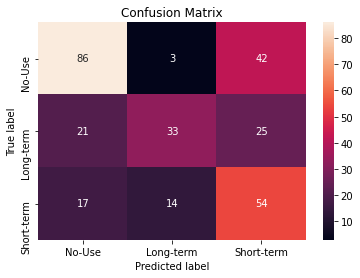

In [ ]:
# predecimos en test y evaluamos métricas y vemos la matriz de confusión

predict3 = gbc_best.predict(X_test3)
print(classification_report(y_test3, predict3))

conf_matrix3 = confusion_matrix(y_test3, predict3)
print(conf_matrix3)
ax = sns.heatmap(conf_matrix3, annot= True)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
m = ['No-Use','Long-term','Short-term']
ax.set_xticklabels(m);
ax.set_yticklabels(m);

##### Vemos la importancia de las características según Gradient Boosting

In [ ]:
# se basa en la entropía para obtener las características 

importances = pd.DataFrame({'Feature': X_train3.columns, 'Importancia': gbc_best.feature_importances_ })
importances = importances.sort_values(by = ['Importancia'], ascending = False)
importances

,Feature,Importancia
3,Children,0.365880
0,Age,0.354410
1,Education,0.145564
4,Living_index,0.043170
2,Husband_education,0.037321
6,Husband_work_1,0.022779
8,Husband_work_3,0.011320
7,Husband_work_2,0.010103
5,Media_exposure,0.009454


Text(0.5, 1.0, 'Importancia características')

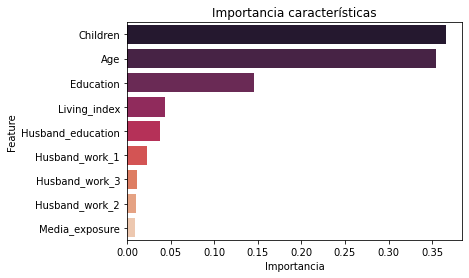

In [ ]:
ax = sns.barplot(data = importances, x= 'Importancia', y= 'Feature', palette="rocket", ci = None)
ax.set_title("Importancia características")

# Modelo con votación

La idea detrás del VotingClassifier 
es combinar clasificadores de aprendizaje automático conceptualmente diferentes y usar un voto mayoritario o las probabilidades promedio predichas (voto suave) para predecir las etiquetas de clase.

En la votación por mayoría, la etiqueta de clase predicha para una muestra particular es la etiqueta de clase que representa la mayoría (modo) de las etiquetas de clase predichas por cada clasificador individual.

En los casos de empate, VotingClassifierseleccionará la clase en función del orden de clasificación ascendente. 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

Los clasificadores que vamos a emplear están definidos con los hiperparámetros que nos ha dado la búsqueda del GridSearch. 

In [ ]:
# definimos los clasificadores que vamos a emplear

clf1 = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
clf2 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
clf3 = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=50, random_state=0)

In [ ]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('ada', clf3)],
     voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['GradientBoostingClassifier', 'Random Forest', 'Ada Boost', 'Ensemble']):
  scores = cross_val_score(clf, X_train3, y_train3, scoring='accuracy', cv=5)
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.56 (+/- 0.02) [GradientBoostingClassifier]
Accuracy: 0.56 (+/- 0.03) [Random Forest]
Accuracy: 0.56 (+/- 0.03) [Ada Boost]
Accuracy: 0.57 (+/- 0.03) [Ensemble]


              precision    recall  f1-score   support

           1       0.74      0.64      0.69       131
           2       0.54      0.28      0.37        79
           3       0.42      0.69      0.52        85

    accuracy                           0.56       295
   macro avg       0.57      0.54      0.53       295
weighted avg       0.59      0.56      0.55       295

[[84  9 38]
 [13 22 44]
 [16 10 59]]


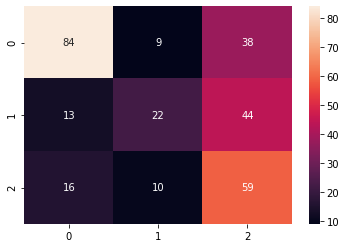

In [ ]:
eclf_hard = eclf.fit(X_train3, y_train3)

# predecimos en test y evaluamos métricas y vemos la matriz de confusión

predict = eclf_hard.predict(X_test3)
print(classification_report(y_test3, predict))

conf_matrix = confusion_matrix(y_test3, predict)
print(conf_matrix)
sns.heatmap(conf_matrix, annot= True)

In [ ]:
eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('ada', clf3)],
     voting='soft')

for clf, label in zip([clf1, clf2, clf3, eclf], ['GradientBoostingClassifier', 'Random Forest', 'Ada Boost', 'Ensemble']):
  scores = cross_val_score(clf, X_train3, y_train3, scoring='accuracy', cv=5)
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

              precision    recall  f1-score   support

           1       0.70      0.63      0.67       131
           2       0.58      0.28      0.38        79
           3       0.42      0.68      0.52        85

    accuracy                           0.55       295
   macro avg       0.57      0.53      0.52       295
weighted avg       0.59      0.55      0.55       295

[[83  4 44]
 [20 22 37]
 [15 12 58]]


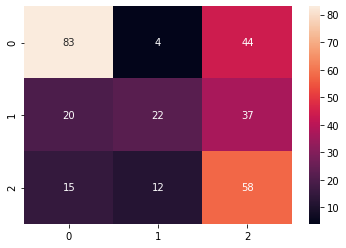

In [ ]:
eclf_soft3 = eclf2.fit(X_train3, y_train3)

# predecimos en test y evaluamos métricas y vemos la matriz de confusión

predict3 = eclf_soft3.predict(X_test3)
print(classification_report(y_test3, predict3))

conf_matrix3 = confusion_matrix(y_test3, predict3)
print(conf_matrix3)
sns.heatmap(conf_matrix3, annot= True)

## Conclusiones

A la vista de los resultados obtenidos, vemos que el mejor modelo para clasificar se corresponde con el Gradient Boosting. 